# Plotting Function #

In [82]:
import matplotlib.pyplot as plt

def plot_shim_stack(shims,title):
    fig, ax = plt.subplots(figsize=(12,12))

    # Starting position for the first shim
    y_position = 0
    previous_ID = 0
    previous_OD = 0
    previous_thickness = 0
    flag=False
    
    for shim in shims:
        thickness = shim['thickness']
        ID = shim['ID']
        OD = shim['OD']
        color = shim['color']
        
        # Adjust y_position if the inner diameter of the current shim is larger than the previous outer diameter
        if ID > previous_OD:
            y_position -= previous_thickness

        if OD < previous_ID:
            flag=True
            y_position -= previous_thickness

        # Draw the outer circle
        outer_circle = plt.Rectangle((-OD / 2, y_position), (OD-ID)/2, thickness, edgecolor='black', facecolor=color, linewidth=1)
        ax.add_artist(outer_circle)
        
        outer_circle = plt.Rectangle((ID / 2, y_position), (OD-ID)/2, thickness, edgecolor='black', facecolor=color, linewidth=1)
        ax.add_artist(outer_circle)
        
        # Draw the inner circle
        if ID > 0:
            inner_circle = plt.Rectangle((-ID / 2, y_position), ID, thickness, edgecolor='black', facecolor='none', linewidth=1)
            ax.add_artist(inner_circle)
            
        # Update previous_OD and y_position for the next shim
        previous_OD = OD
        previous_ID = ID
        if flag:
            y_position += previous_thickness
        else:
            y_position += thickness
            
        flag=False
        previous_thickness = thickness        

    
    # Set the aspect of the plot to be equal
    ax.set_aspect('auto')
    
    # Define the plot limits
    max_diameter = max(shim['OD'] for shim in shims)
    total_height = sum(shim['thickness'] for shim in shims)
    ax.set_xlim(-max_diameter / 2, max_diameter / 2)
    ax.set_ylim(0, total_height)
    
    # Add labels and title
    ax.set_xlabel('Diameter (mm)')
    ax.set_ylabel('Stack Height (mm)')
    ax.set_title(title)

    plt.show()

In [83]:
import matplotlib.pyplot as plt

def plot_multiple_shim_stacks(shim_stacks, titles, fig_size=(12, 12)):
    num_stacks = len(shim_stacks)
    fig, axs = plt.subplots(1, num_stacks, figsize=fig_size, sharey=True)

    # Set the overall vertical limits based on the tallest shim stack
    max_total_height = max(sum(shim['thickness'] for shim in shims) for shims in shim_stacks)
    max_diameter = max(max(shim['OD'] for shim in shims) for shims in shim_stacks)
    
    for ax, shims, title in zip(axs, shim_stacks, titles):
        # Starting position for the first shim
        y_position = 0
        previous_ID = 0
        previous_OD = 0
        previous_thickness = 0
        flag = False

        for shim in shims:
            thickness = shim['thickness']
            ID = shim['ID']
            OD = shim['OD']
            color = shim['color']

            # Adjust y_position if the inner diameter of the current shim is larger than the previous outer diameter
            if ID > previous_OD:
                y_position -= previous_thickness

            if OD < previous_ID:
                flag = True
                y_position -= previous_thickness

            # Draw the outer rectangle
            outer_rect_left = plt.Rectangle((-OD / 2, y_position), (OD - ID) / 2, thickness, edgecolor='black', facecolor=color, linewidth=1)
            ax.add_artist(outer_rect_left)

            outer_rect_right = plt.Rectangle((ID / 2, y_position), (OD - ID) / 2, thickness, edgecolor='black', facecolor=color, linewidth=1)
            ax.add_artist(outer_rect_right)

            # Draw the inner rectangle
            if ID > 0:
                inner_rect = plt.Rectangle((-ID / 2, y_position), ID, thickness, edgecolor='black', facecolor='none', linewidth=1)
                ax.add_artist(inner_rect)

            # Update previous_OD and y_position for the next shim
            previous_OD = OD
            previous_ID = ID
            if flag:
                y_position += previous_thickness
            else:
                y_position += thickness

            flag = False
            previous_thickness = thickness

        # Set the aspect of the plot
        ax.set_aspect('auto')

        # Define the plot limits
        ax.set_xlim(-max_diameter / 2, max_diameter / 2)
        ax.set_ylim(0, max_total_height)

        # Add labels and title
        ax.set_xlabel('Diameter (mm)')
        ax.set_ylabel('Stack Height (mm)')
        ax.set_title(title)

        # Add grid and set ticks every millimeter
        ax.grid(True, which='both', axis='y', color="black",linewidth=0.2)  # Add horizontal grid lines
        ax.set_xticks(range(-int(max_diameter / 2), int(max_diameter / 2) + 1, 2))
        ax.yaxis.set_major_locator(plt.MultipleLocator(0.3))  # Major ticks every 1 mm
        ax.yaxis.set_minor_locator(plt.MultipleLocator(0.15))  # Minor ticks every 0.15 mm

        # Calculate and display total stack height
        total_height = sum(shim['thickness'] for shim in shims)
        ax.text(0.98, 0.98, f'Total Height: {total_height:.2f} mm', ha='right', va='top', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.5))

    plt.tight_layout()
    plt.show()


# Rebound Check Tunes #

This image shows the purpose of the rebound check stack:

![alt text](image-4.png)

It prevents bleed trough the rebound needle orifice in compression

### Preloaded Check ###

![alt text](image.png)

In [84]:
Rebound_Check_Tune_Preloaded = [
    {'thickness': 1, 'ID': 9, 'OD': 22 , 'color':"dimgray"},#rebound check plate
    {'thickness': 0.15, 'ID': 9, 'OD': 22 , 'color':"tomato"},
    {'thickness': 0.15, 'ID': 9, 'OD': 19 , 'color':"tomato"},
    {'thickness': 0.2, 'ID': 19.4, 'OD': 22 , 'color':"black"}, #ring shim
    {'thickness': 0.2, 'ID': 9, 'OD': 22 , 'color':"tomato"},
    {'thickness': 0.2, 'ID': 9, 'OD': 11 , 'color':"tomato"},
    #{'thickness': 1, 'ID': 9, 'OD': 12 , 'color':"dimgray"} # piston rod nut
]

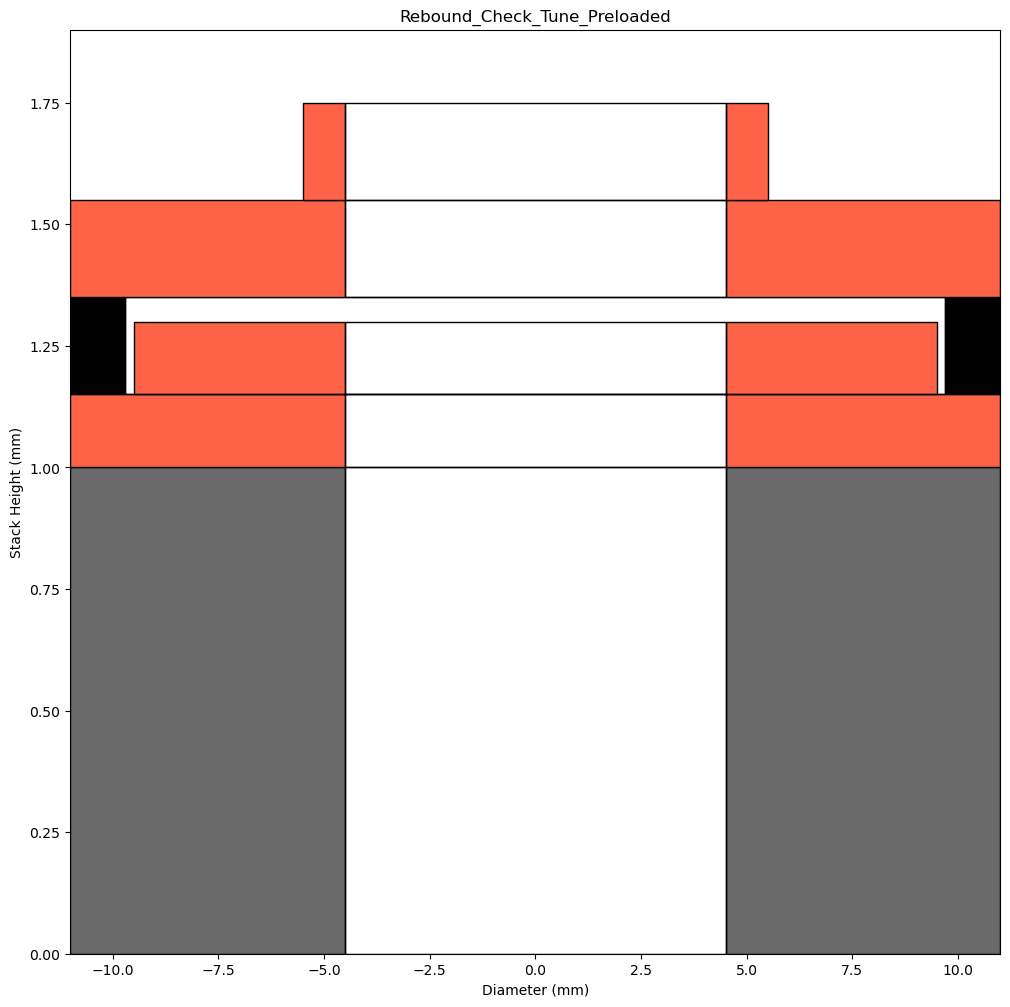

In [85]:
#%%script false
plot_shim_stack(Rebound_Check_Tune_Preloaded,'Rebound_Check_Tune_Preloaded')

### Linear Check ###

![alt text](image-5.png)

In [86]:
Rebound_Check_Tune_Linear= [
    {'thickness': 1, 'ID': 9, 'OD': 25 , 'color':"dimgray"},# rebound check plate
    {'thickness': 0.15, 'ID': 9, 'OD': 22,'color':"tomato"},
    {'thickness': 0.15, 'ID': 9, 'OD': 22,'color':"tomato"},
    {'thickness': 0.2, 'ID': 9, 'OD': 11 ,'color':"tomato"},
    {'thickness': 0.2, 'ID': 9, 'OD': 11 ,'color':"tomato"},
    #{'thickness': 1, 'ID': 9, 'OD': 12 , 'color':"dimgray"} # damper rod nut
]

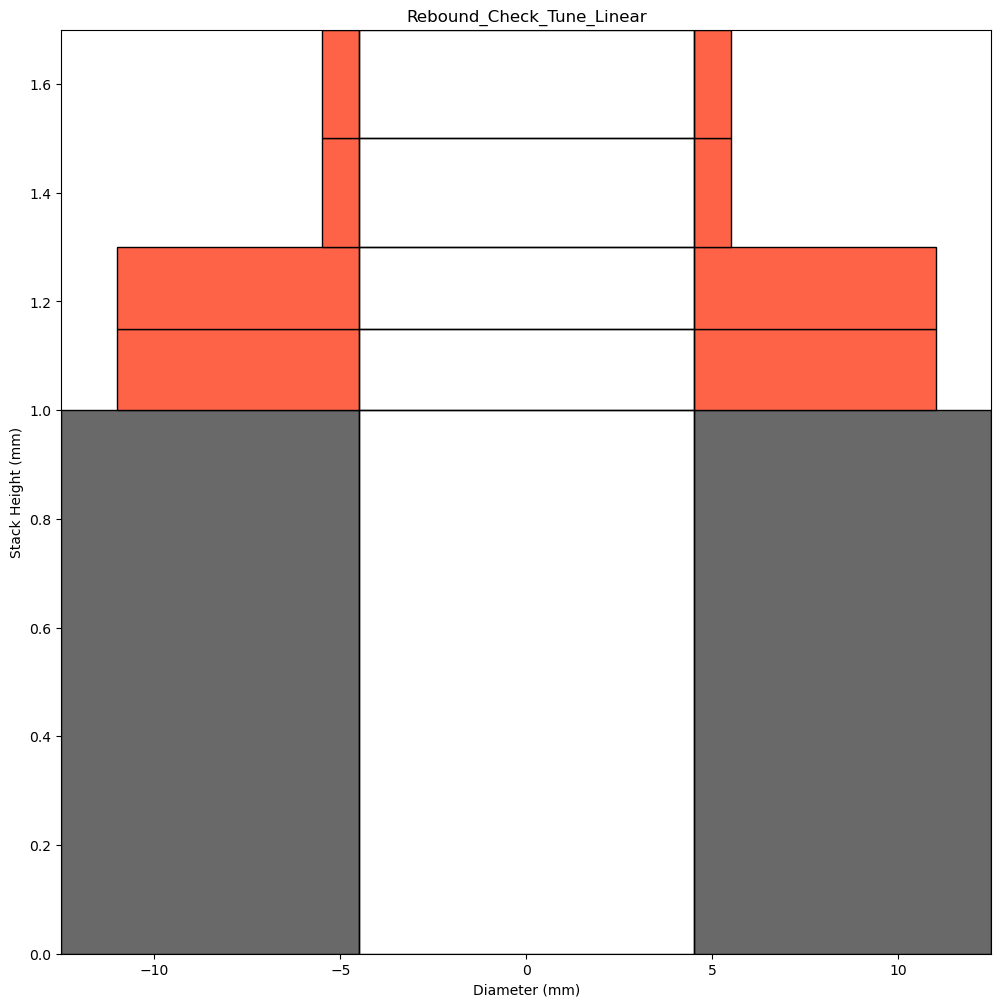

In [87]:
#%%script false
plot_shim_stack(Rebound_Check_Tune_Linear,'Rebound_Check_Tune_Linear')

### Rebound Check Tune - Preloaded vs Linear ###

In [88]:
%%script false
plot_multiple_shim_stacks( [Rebound_Check_Tune_Preloaded,Rebound_Check_Tune_Linear],['Rebound Check Tune Preloaded','Rebound Check Tune Linear'])

Couldn't find program: 'false'


# Rebound Tunes - Preloaded #

### Rebound - M ###

![alt text](image-2.png)

In [89]:
Rebound_M= [
    {'thickness': 1, 'ID': 9, 'OD': 25 , 'color':"dimgray"}, # main piston

    {'thickness': 0.15, 'ID': 9, 'OD': 22,'color':"red"},

    {'thickness': 0.2, 'ID': 19.4, 'OD': 22,'color':"black"}, # ring shim

    {'thickness': 0.15, 'ID': 9, 'OD': 19,'color':"red"},

    {'thickness': 0.2, 'ID': 9, 'OD': 22,'color':"red"},
    {'thickness': 0.2, 'ID': 9, 'OD': 22,'color':"red"},

    {'thickness': 0.2, 'ID': 9, 'OD': 20,'color':"red"},
    {'thickness': 0.2, 'ID': 9, 'OD': 20,'color':"red"},

    {'thickness': 0.15, 'ID': 9, 'OD': 18,'color':"red"},

    {'thickness': 0.3, 'ID': 9, 'OD': 11,'color':"red"},
    {'thickness': 0.3, 'ID': 9, 'OD': 11,'color':"red"},

    {'thickness': 0.2, 'ID': 9, 'OD': 11,'color':"red"}
]

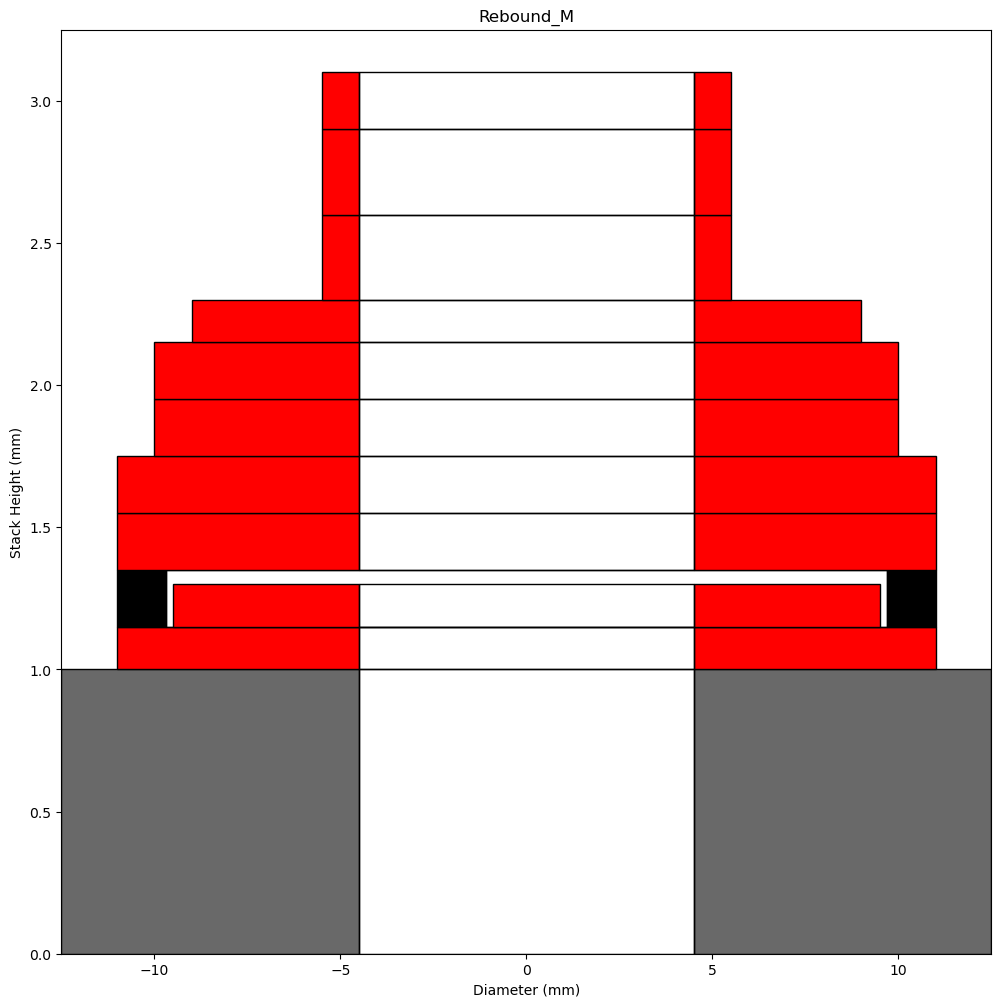

In [90]:
#%%script false
plot_shim_stack(Rebound_M,'Rebound_M')

# Rebound Tunes - Linear #

### Rebound - LN (stiffest) ###

![alt text](imagem.png)

In [91]:
Rebound_LN = [
    {'thickness': 1, 'ID': 9, 'OD': 25, 'color': "dimgray"}, # main piston

    {'thickness': 0.2, 'ID': 9, 'OD': 22, 'color': "red"},
    {'thickness': 0.2, 'ID': 9, 'OD': 22, 'color': "red"},
    {'thickness': 0.2, 'ID': 9, 'OD': 22, 'color': "red"},
    
    {'thickness': 0.2, 'ID': 9, 'OD': 20, 'color': "red"},
    {'thickness': 0.2, 'ID': 9, 'OD': 20, 'color': "red"},
    {'thickness': 0.2, 'ID': 9, 'OD': 20, 'color': "red"},

    {'thickness': 0.2, 'ID': 9, 'OD': 19, 'color': "red"},

    {'thickness': 0.2, 'ID': 9, 'OD': 18, 'color': "red"},
    
    {'thickness': 0.2, 'ID': 9, 'OD': 11, 'color': "red"},
    {'thickness': 0.2, 'ID': 9, 'OD': 11, 'color': "red"}
]

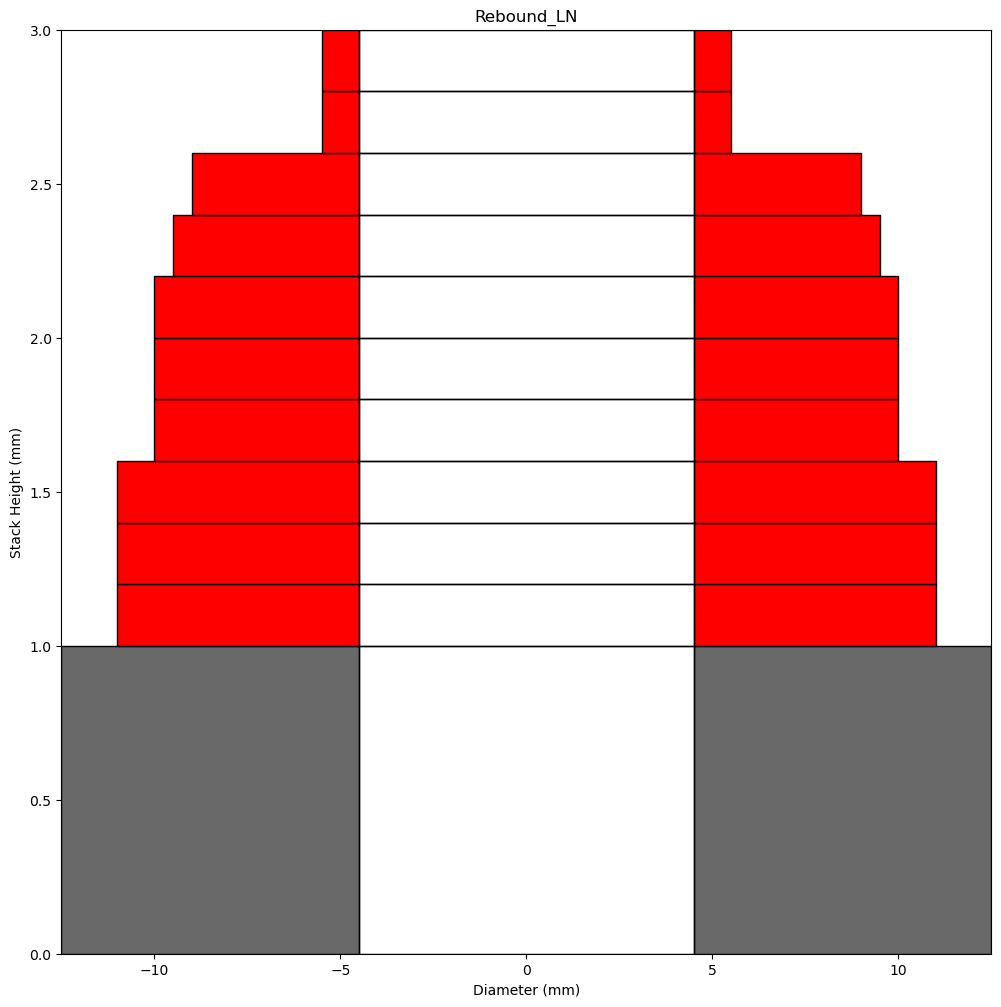

In [92]:
#%%script false
plot_shim_stack(Rebound_LN,'Rebound_LN')

# Compression Tunes #

### Compression - M ###

![alt text](image-3.png)

In [93]:
Compression_M = [
    #{'thickness': 1, 'ID': 9, 'OD': 12 , 'color':"dimgray"}, # top out plate

    {'thickness': 0.2, 'ID': 9, 'OD': 11, 'color':"blue"},

    {'thickness': 0.3, 'ID': 9, 'OD': 11, 'color':"blue"},
    {'thickness': 0.3, 'ID': 9, 'OD': 11, 'color':"blue"},
    {'thickness': 0.3, 'ID': 9, 'OD': 11, 'color':"blue"},

    {'thickness': 0.15, 'ID': 9, 'OD': 20, 'color':"blue"},
    {'thickness': 0.15, 'ID': 9, 'OD': 20, 'color':"blue"},

    {'thickness': 0.1, 'ID': 9, 'OD': 22, 'color':"blue"},
    {'thickness': 0.1, 'ID': 9, 'OD': 22, 'color':"blue"},

    {'thickness': 0.1, 'ID': 9, 'OD': 24, 'color':"blue"},

    {'thickness': 0.15, 'ID': 9, 'OD': 24, 'color':"blue"},
    {'thickness': 0.15, 'ID': 9, 'OD': 24, 'color':"blue"}
]

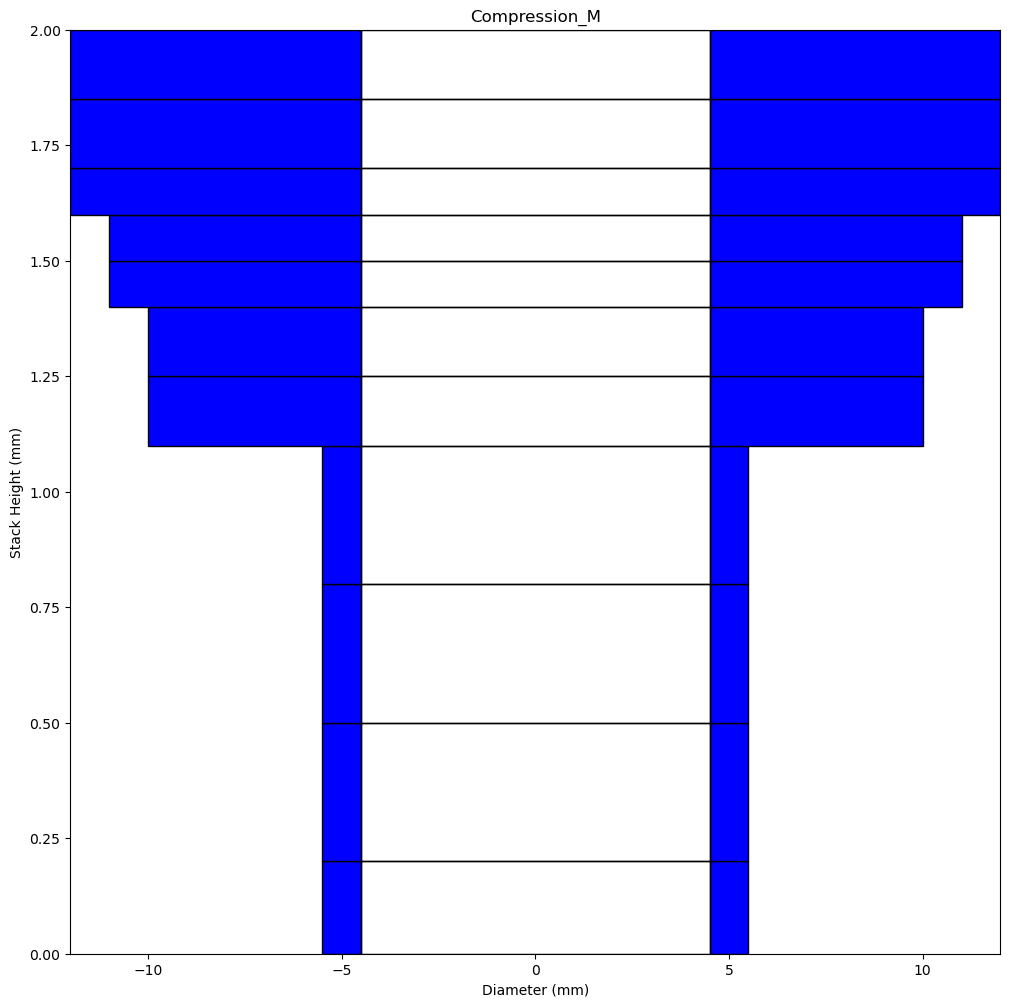

In [94]:
#%%script false
plot_shim_stack(Compression_M,'Compression_M')

### Compression - H ###

![alt text](imagem-1.png)

In [95]:
Compression_H = [
    #{'thickness': 1, 'ID': 9, 'OD': 12 , 'color':"dimgray"}, # top out plate

    {'thickness': 0.2, 'ID': 9, 'OD': 11, 'color': "blue"},
    {'thickness': 0.2, 'ID': 9, 'OD': 11, 'color': "blue"},
    {'thickness': 0.2, 'ID': 9, 'OD': 11, 'color': "blue"},

    {'thickness': 0.3, 'ID': 9, 'OD': 11, 'color': "blue"},

    {'thickness': 0.15, 'ID': 9, 'OD': 20, 'color': "blue"},
    {'thickness': 0.15, 'ID': 9, 'OD': 20, 'color': "blue"},

    {'thickness': 0.15, 'ID': 9, 'OD': 22, 'color': "blue"},
    {'thickness': 0.15, 'ID': 9, 'OD': 22, 'color': "blue"},
    {'thickness': 0.15, 'ID': 9, 'OD': 22, 'color': "blue"},

    {'thickness': 0.15, 'ID': 9, 'OD': 24, 'color': "blue"},
    {'thickness': 0.15, 'ID': 9, 'OD': 24, 'color': "blue"},
]

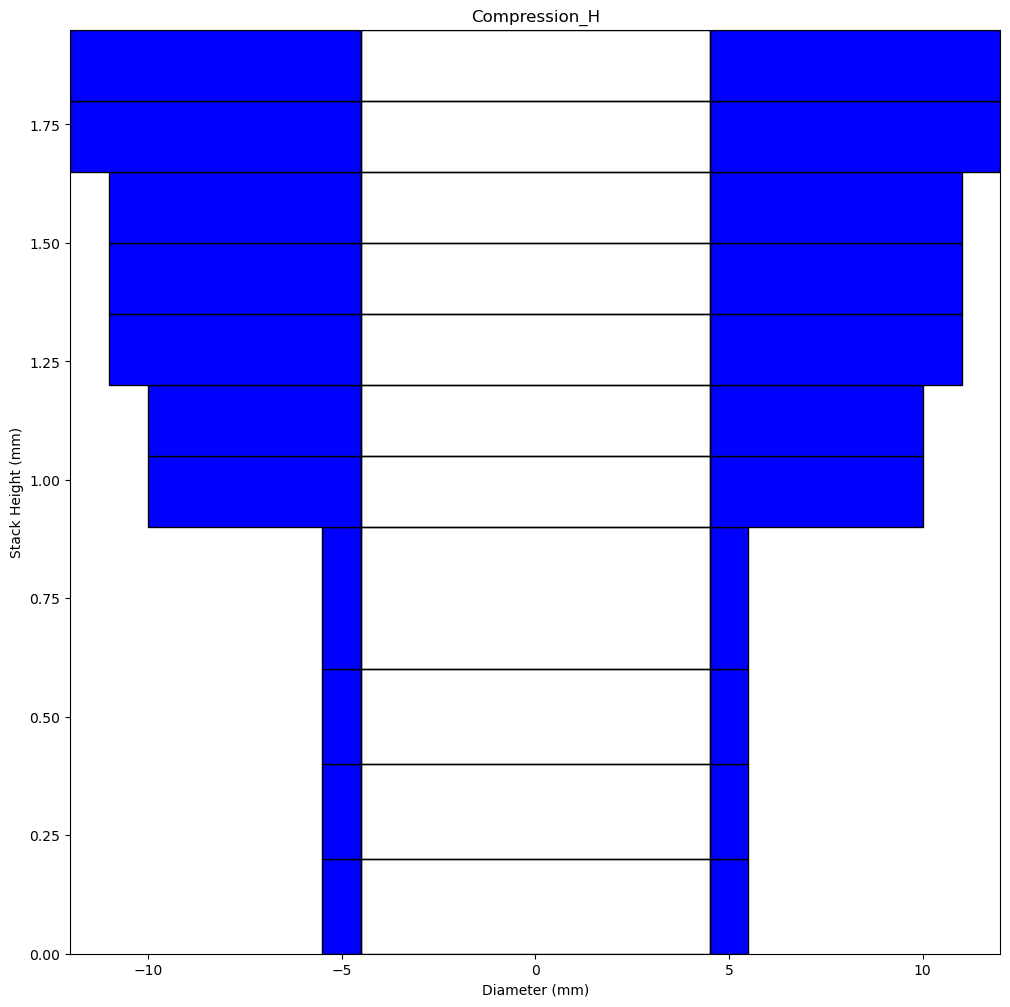

In [96]:
#%%script false
plot_shim_stack(Compression_H,'Compression_H')

# Full Stack #

To plot the complete piston stack, create a variable in the following format, and then call the plot function: 

Tune_CR = Compression_Tune + Rebound_Tune + Rebound_Check_Tune


### MM Tune ###

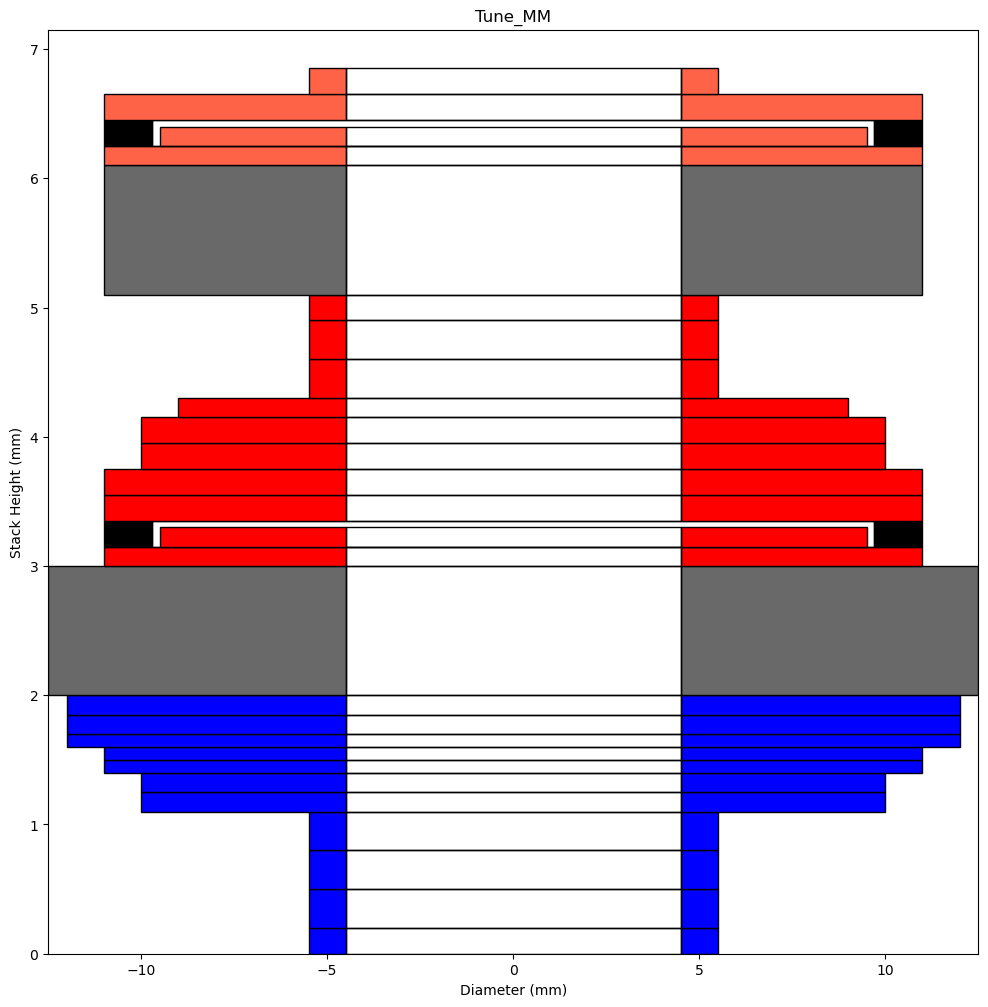

In [97]:
Tune_MM = Compression_M + Rebound_M + Rebound_Check_Tune_Preloaded

plot_shim_stack(Tune_MM, 'Tune_MM')

### H-LN Tune ###

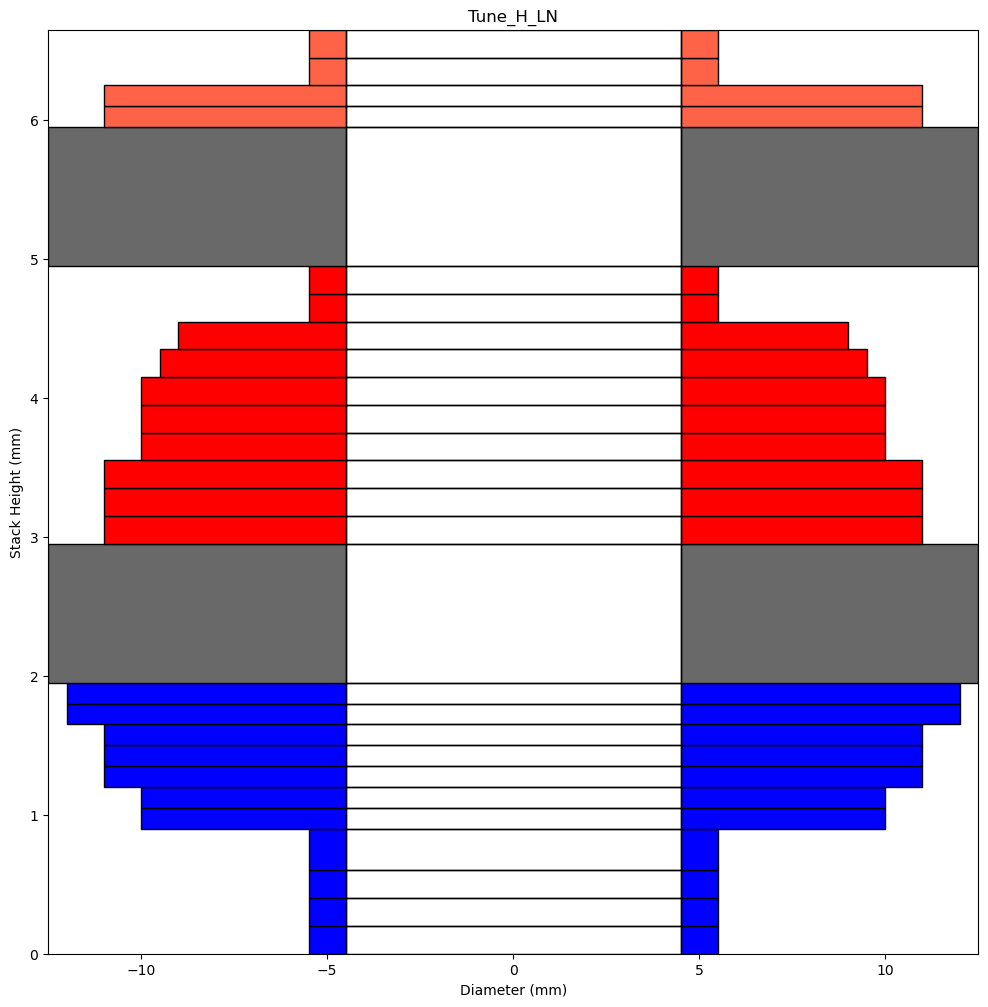

In [98]:
Tune_H_LN = Compression_H + Rebound_LN + Rebound_Check_Tune_Linear
#%%script false
plot_shim_stack(Tune_H_LN, 'Tune_H_LN')

# Comparing Tunes #

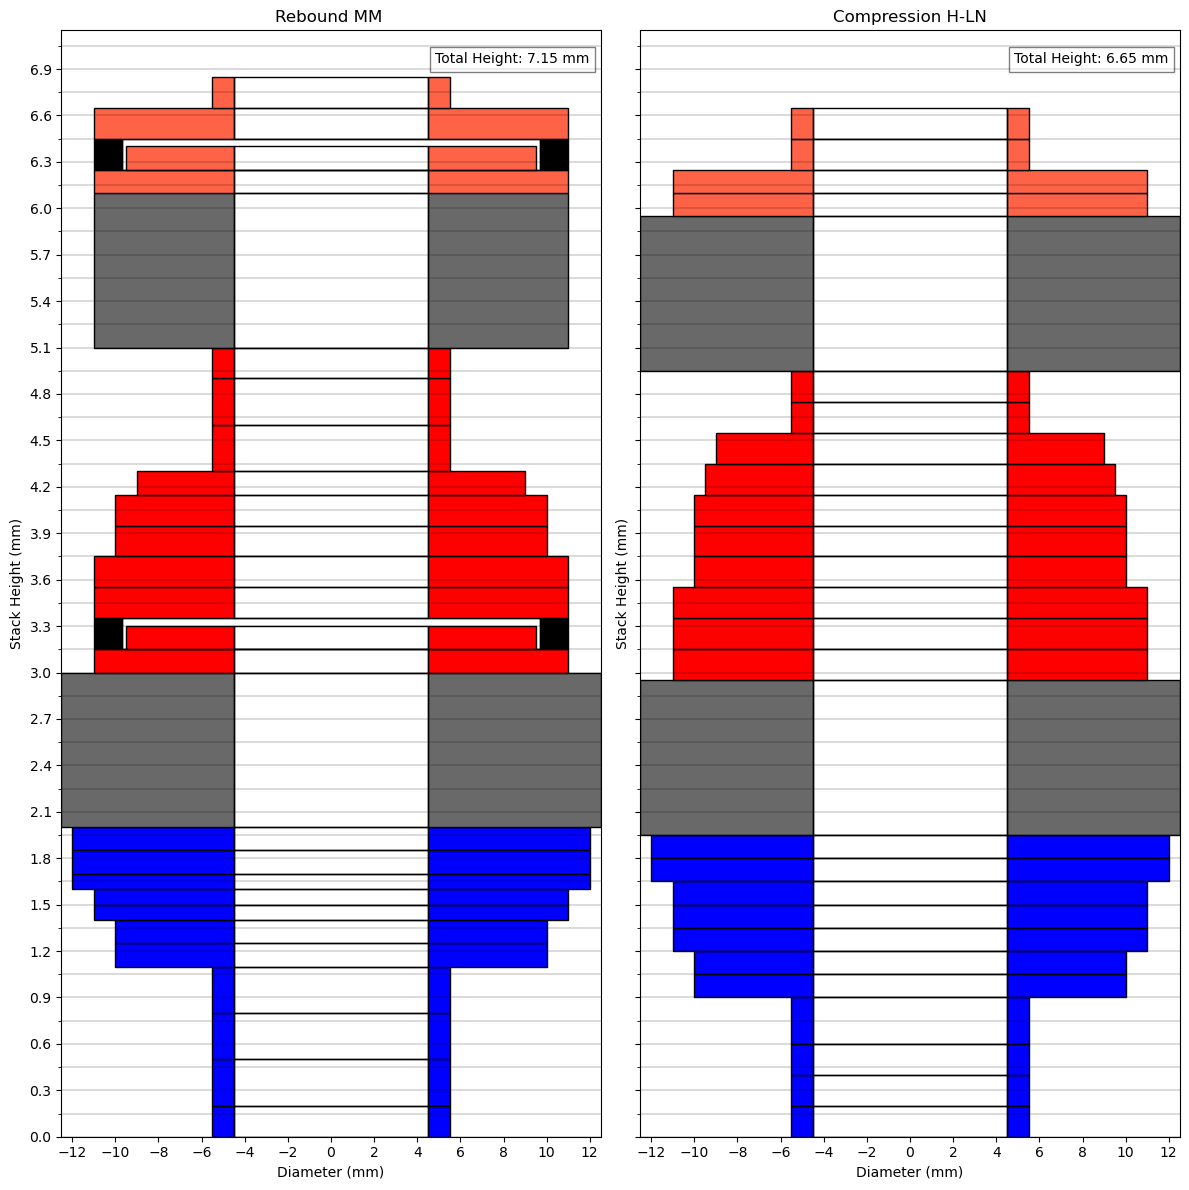

In [99]:
plot_multiple_shim_stacks([Tune_MM, Tune_H_LN], ["Rebound MM ", "Compression H-LN"])